In [1]:
import jax
import jax.numpy as jnp
import time

# --- 1. JAX Setup ---
key = jax.random.PRNGKey(42)

# --- 2. Imports from the 'chewc' library ---
from chewc.sp import SimParam
from chewc.population import Population, msprime_pop # Use msprime_pop
from chewc.trait import add_trait_a
from chewc.burnin import run_burnin
# Import the generation runner
from chewc.pipe import run_generation


There are two functions to simulate founder genomes

1) quickHaplo

    this simulate a randomized population where each haplotype generated is 1/0. This creates founders with high amounts of genetic diversity and no population structure.

2) msprime_pop

    this function uses the msprime python library to create populations with population structures generated through a separate coalescent simulation

In [2]:
import jax
from chewc.population import msprime_pop # Assuming this returns (pop, map) now
from chewc.sp import SimParam
import numpy as np
# JAX random key setup
key = jax.random.PRNGKey(42)
key, pop_key = jax.random.split(key)

# 1. Generate the founder population and its genetic map together.
#    They are created as a linked pair.
founder_pop, genetic_map = msprime_pop(
    key=pop_key, n_ind=100, n_loci_per_chr=50, n_chr=3, ploidy=2
)

# 2. Use the founder population and its map to configure the simulation's
#    rules. The method name `from_founder_pop` makes this link explicit.
SP = SimParam.from_founder_pop(
    founder_pop=founder_pop,
    gen_map=genetic_map,
    sexes="yes" # We can still override other parameters
)

# 3. Proceed with the simulation.
#    - `SP` is now the self-contained rulebook.
#    - `founder_pop` is the starting state.
#    They are no longer directly attached to each other.
print("--- Configuration (derived from founders) ---")
print(SP)
print("\n--- Initial State ---")
print(founder_pop)

--- Configuration (derived from founders) ---
SimParam(nChr=3, nTraits=0, ploidy=2, sexes='yes')

--- Initial State ---
Population(nInd=100, nTraits=0, has_ebv=No)


In [3]:
print(SP)
print(founder_pop)
print(founder_pop.nInd)
print(founder_pop.id)
print(founder_pop.geno.shape)

SimParam(nChr=3, nTraits=0, ploidy=2, sexes='yes')
Population(nInd=100, nTraits=0, has_ebv=No)
100
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
(100, 3, 2, 50)


Column Means:
[0.125      0.16499999 0.435      0.375      0.48499998 0.22
 0.475      0.175      0.14999999 0.315      0.84499997 0.17999999
 0.09999999 0.85999995 0.695      0.49499997 0.16499999 0.26
 0.26       0.295      0.09999999 0.09       0.095      0.39499998
 0.095      0.32       0.715      0.48       0.13       0.24
 0.53499997 0.90999997 0.63       0.92499995 0.225      0.825
 0.16499999 0.16499999 0.685      0.39999998 0.16499999 0.805
 0.5        0.295      0.17       0.5        0.105      0.285
 0.61       0.175      0.29       0.205      0.7        0.29999998
 0.74       0.875      0.715      0.09       0.84499997 0.59
 0.815      0.095      0.205      0.105      0.11499999 0.19
 0.435      0.275      0.42       0.42       0.34       0.29999998
 0.79999995 0.45       0.155      0.825      0.825      0.185
 0.695      0.145      0.145      0.26       0.185      0.16499999
 0.13       0.26999998 0.38       0.45499998 0.13499999 0.33499998
 0.48999998 0.12       0.539999

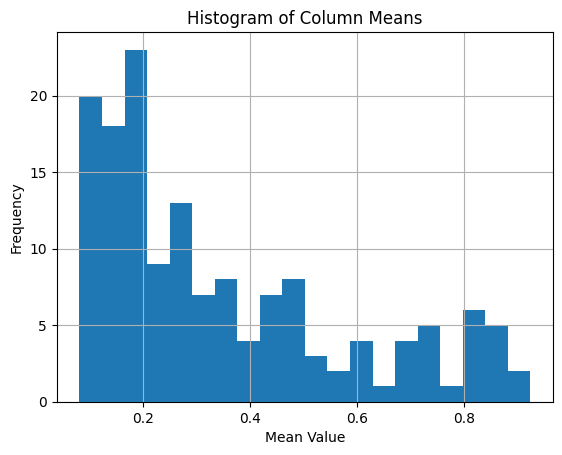

In [4]:
import matplotlib.pyplot as plt
# Calculate the column means
column_means = np.mean(founder_pop.dosage, axis=0)
column_means = column_means * .5
print("Column Means:")
print(column_means)

# Create a histogram of the column means
plt.hist(column_means, bins=20)
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column Means')
plt.grid(True)
plt.show()

Transposed shape: (150, 200)
Shape of correlation matrix: (150, 150)

Correlation matrix (top 5x5 corner):
[[ 1.         -0.16801564 -0.11817179  0.14443321  0.02646943]
 [-0.16801564  1.          0.50661533 -0.3443296   0.08072483]
 [-0.11817179  0.50661533  1.         -0.42967439  0.07678587]
 [ 0.14443321 -0.3443296  -0.42967439  1.         -0.04907988]
 [ 0.02646943  0.08072483  0.07678587 -0.04907988  1.        ]]


(array([2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 6.000e+00, 2.000e+00,
        8.000e+00, 0.000e+00, 8.000e+00, 8.000e+00, 3.000e+01, 5.000e+01,
        8.000e+01, 1.260e+02, 4.220e+02, 1.026e+03, 2.062e+03, 3.174e+03,
        4.158e+03, 4.102e+03, 3.188e+03, 1.930e+03, 1.016e+03, 4.500e+02,
        2.040e+02, 8.600e+01, 7.600e+01, 2.400e+01, 2.000e+01, 2.400e+01,
        2.000e+00, 4.000e+00, 8.000e+00, 2.000e+00, 4.000e+00, 8.000e+00,
        2.000e+00, 2.000e+00, 1.400e+01, 2.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 1.520e+02]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,

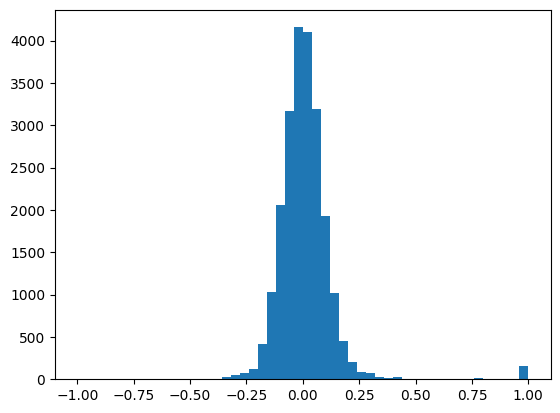

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Transpose the array so that loci are in rows
transposed_array = founder_pop.haplo_matrix.T
print(f"Transposed shape: {transposed_array.shape}")     # (loci, samples)

# Calculate the correlation matrix
locus_correlations = np.corrcoef(transposed_array)

print(f"Shape of correlation matrix: {locus_correlations.shape}") # (loci, loci)
print("\nCorrelation matrix (top 5x5 corner):")
print(locus_correlations[:5, :5])

plt.hist(locus_correlations.flatten(),bins=50)

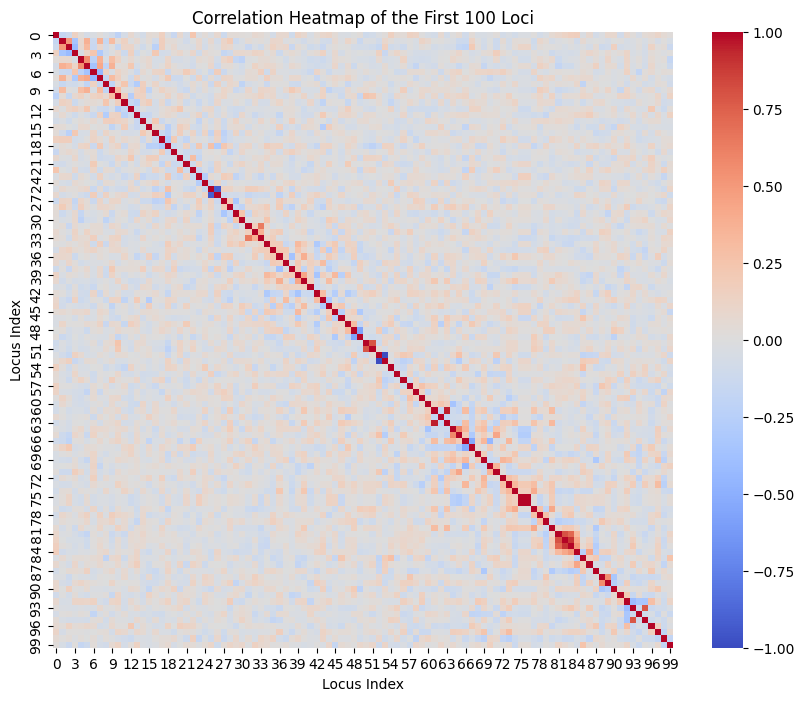

In [6]:
import seaborn as sns
correlation_subset = locus_correlations[:100, :100]

# 2. Set up the plot for better visualization
plt.figure(figsize=(10, 8)) # Adjust figure size for readability

# 3. Create the heatmap using seaborn
# cmap='coolwarm' is a good choice for correlations: blue for negative, red for positive
sns.heatmap(correlation_subset, cmap='coolwarm')

# 4. Add titles and labels for clarity
plt.title('Correlation Heatmap of the First 100 Loci')
plt.xlabel('Locus Index')
plt.ylabel('Locus Index')

# 5. Display the plot
plt.show()
